# Rewriting AR process
$$X_t=\phi_0+\phi_1X_{t-1}+\phi_2X_{t-2}+\dots+\phi_pX_{t-p}+Z_t \ \ \ (\text{where }Z_t\sim Normal(0,\sigma_z^2)$$ 
$$\mu=\phi_0+\phi_1\mu+\phi_2\mu+\dots+\phi_p\mu$$
--------------------------------------------

---


$$X_t-\mu=\phi_1(X_{t-1}-\mu)+\phi_2(X_{t-2}-\mu)+\dots+\phi_p(X_{t-p}-\mu)+Z_t$$

If $\tilde{X}_t=X_t-\mu$, then $E[\tilde{X}_t]=0$, <br>
and
$$\tilde{X}_t=\phi_1\tilde{X}_{t-1}+\phi_2\tilde{X}_{t-2}+\dots+\phi_p\tilde{X}_{t-p}+Z_t$$

# Yule-Walker 공식
- Autocorrelation Function
$$\rho(k)=\phi_1\rho(k-1)+\phi_2\rho(k-2)+\dots+\phi_p\rho(k-p)$$
$$\text{for }k\geq1,\ \rho(0)=1 \text{ and } \rho(k)=\rho(-k)\text{ for }k<0 $$

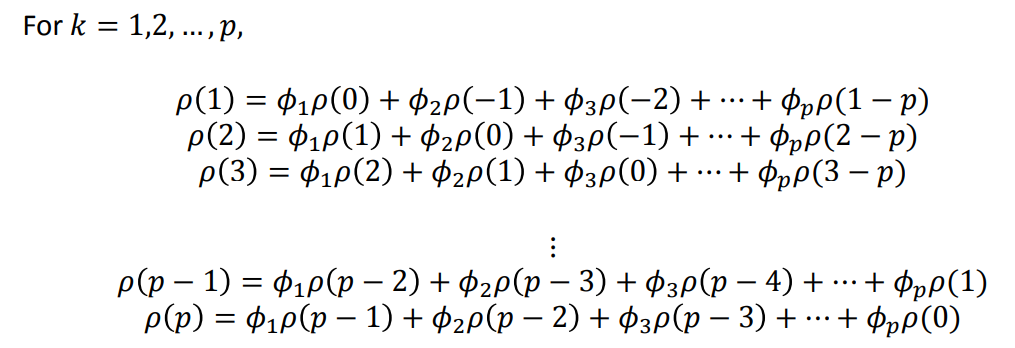
<br>
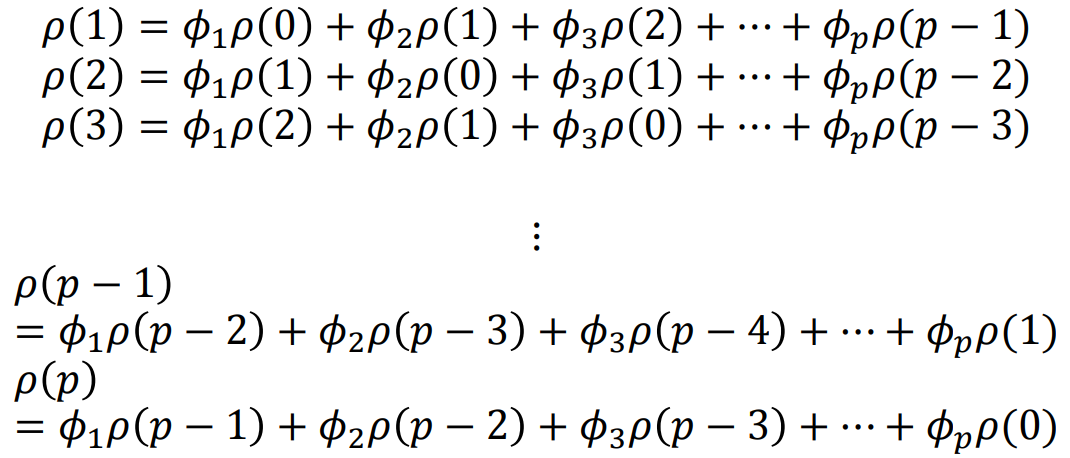
<br>
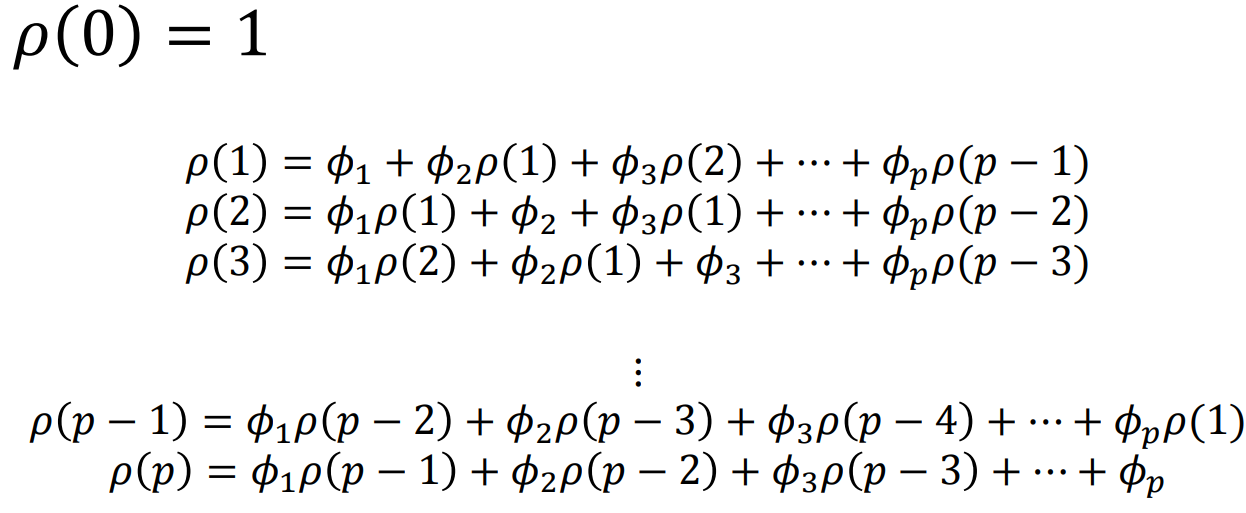

# Yule-Walker 공식의 행렬식 표현

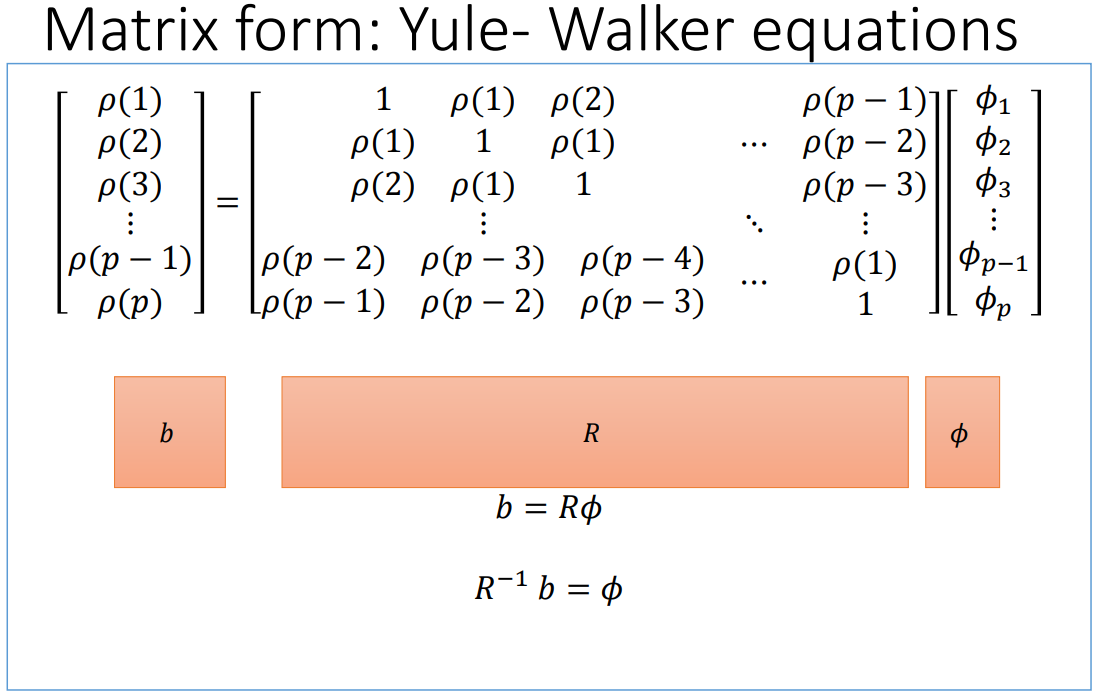

## AR 모델 계수 추정
$\rho(k)$와 $r_k$ 행렬은 모두 
- $p\times p$ 대칭행렬
- positive semidefinite matrices ([참고]([https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=sw4r&logNo=221495616715))
- 고유값은 0이 아님
- 역행렬을 가짐 <br>

=> 즉, 유일해를 가짐 ($\phi$를 추정할 수 있음)


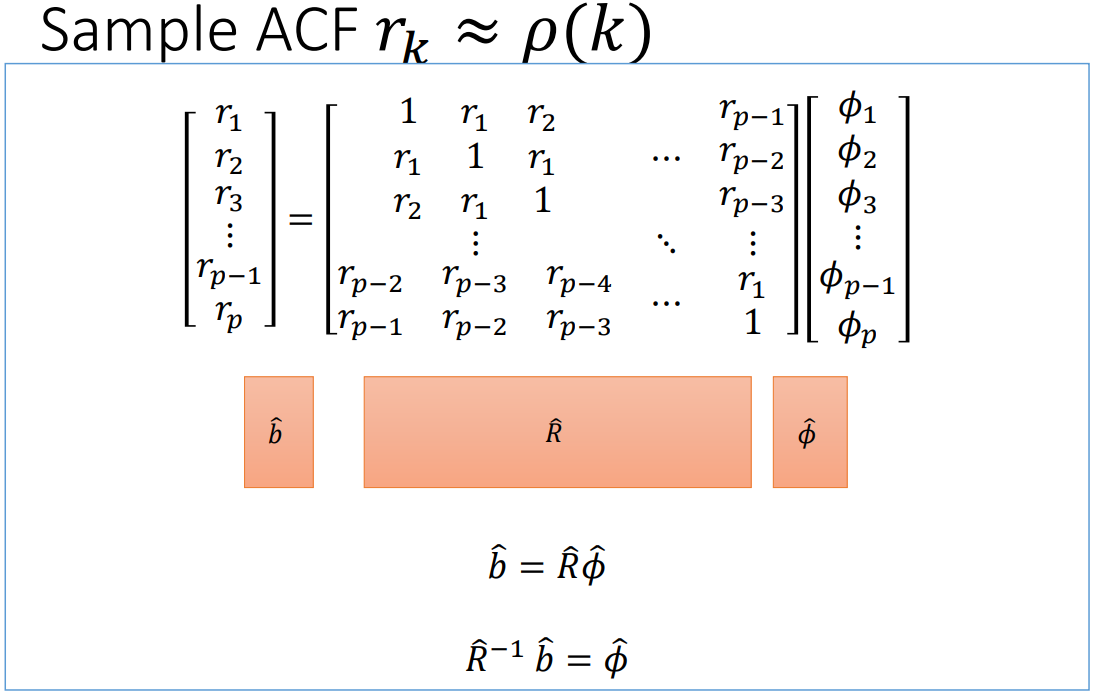

**<AR(2) 모델의 계수 추정>**
$$X_t=\phi_1X_{t-1}+\phi_2X_{t-2}+Z_t$$
1. acf() 함수를 통해 $r_1, r_2$ 도출
2. 아래 식 해결 

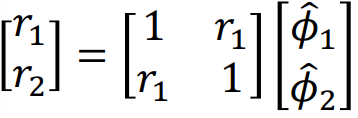

# AR 모델 파라미터 추정 

AR(2) 모델에서의 파라미터
$$X_t=\phi_1X_{t-1}+\phi_2X_{t-2}+Z_t$$
- $\phi_1, \phi_2$
- $\sigma_Z$


### 분산($\sigma_z$) 추정
$$Var(X_t)=\phi_1^2Var(X_{t-1}+\phi_2^2Var(X_{T-2})+2\phi_1\phi_2cov(X_{t-1},X_{t-2})+\sigma_z^2$$

- $Var(X_t)=r(0)$이므로,
$$\sigma_z^2=r(0)[1-\phi_1^2-\phi_2^2-\frac{2\phi_1\phi_2r(1)}{r(0)}]$$
$$\sigma_z^2=r(0)[1-\phi_1^2-\phi_2^2-2\phi_1\phi_2\rho_1]$$

- Yule-Walker 행렬에 따라 $\rho_1=\phi_1+\rho_1\phi_2,\ \ \rho_2=\phi_1\rho_1+\phi_2$이므로,
$$\sigma_z^2=r(0)[1-\phi_1^2-\phi_1\phi_2\rho_1-\phi_2^2-\phi_1\phi_2\rho_1]$$
$$\sigma_z^2=r(0)[1-\phi_1(\phi_1-\phi_2\rho_1)-\phi_2(\phi_2-\phi_1\rho_1)]$$
$$\sigma_z^2=r(0)(1-\phi_1\rho_1-\phi_2\rho_2)$$
$$\hat{\sigma_z}^2=c_0(1-\hat{\phi_1}r_1-\hat{\phi_2}r_2)$$

# 시뮬레이션

## AR(2)

### simulate AR process

In [2]:
n=10000
set.seed(2017)

ar.process=arima.sim(n, model=list(ar=c(1/3,1/2)), sd=4)
ar.process[1:5]

[1] 4.087685 5.598492 3.019295 2.442354 5.398302

### find and name 2nd, 3rd sample autocorrelation

In [4]:
acf(ar.process, plot=F)


Autocorrelations of series ‘ar.process’, by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.681 0.726 0.584 0.558 0.479 0.438 0.382 0.346 0.305 0.276 0.246 0.218 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
0.187 0.171 0.141 0.128 0.112 0.087 0.083 0.068 0.059 0.050 0.039 0.037 0.029 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
0.031 0.028 0.028 0.026 0.026 0.020 0.019 0.016 0.016 0.018 0.015 0.018 0.010 
   39    40 
0.012 0.007 

In [9]:
 r=acf(ar.process, plot=F)$acf[2:3] 
 print(r[1])
 print(r[2])

[1] 0.6814103
[1] 0.7255825


### matrix R

In [11]:
R=matrix(1,2,2) # 원소가 모두 1인 2x2 행렬

R[1,2]=r[1]
R[2,1]=r[1]
R

1.0000000,0.6814103
0.6814103,1.0000000


### b-column vector

In [12]:
b=matrix(r,2,1) # r의 열벡터 
b

0.6814103
0.7255825


### solve(R,b) solves Rx=b, and gives x=R^(-1)b vector

In [13]:
phi.hat=solve(R,b)
phi.hat

0.3490720
0.4877212


### variance estimation (Z의 분산)

In [ ]:
c0=acf(ar.process, type='covariance', plot=F)$acf[1]
var.hat=c0*(1-sum(phi.hat*r))

### plot time series, along with acf and pacf

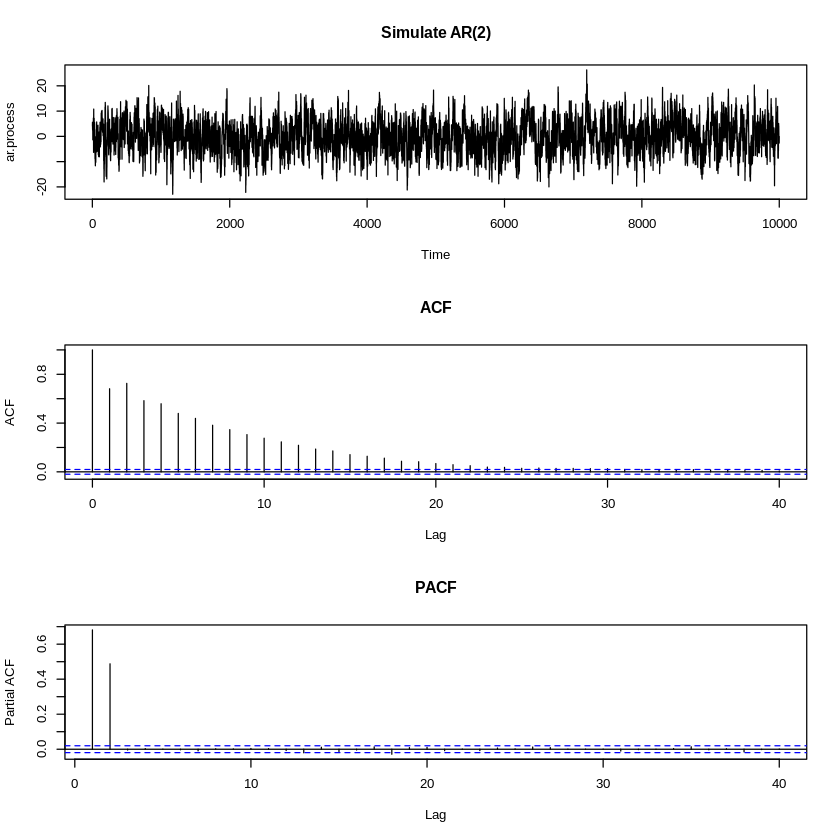

In [14]:
par(mfrow=c(3,1))
plot(ar.process, main='Simulate AR(2)')
acf(ar.process, main='ACF')
pacf(ar.process, main='PACF')

=> AR(2)에서 PACF cuts off after lag 2 임을 알 수 있음

## AR(3)

### simulate AR process

In [15]:
n=100000
set.seed(2017)

ar.process=arima.sim(n, model=list(ar=c(1/3,1/2,7/100)), sd=4)
ar.process[1:5]

[1] -11.837252  -6.011466  -7.446648  -2.330781  -7.619922

### find and name 2nd, 3rd, 4th sample autocorrelation
- $r_1, r_2, r_3$

In [16]:
acf(ar.process, plot=F)


Autocorrelations of series ‘ar.process’, by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.786 0.818 0.737 0.711 0.665 0.628 0.592 0.559 0.528 0.497 0.468 0.441 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
0.415 0.391 0.366 0.346 0.324 0.306 0.287 0.272 0.255 0.242 0.227 0.215 0.202 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
0.192 0.183 0.173 0.165 0.157 0.149 0.142 0.135 0.128 0.122 0.116 0.112 0.106 
   39    40    41    42    43    44    45    46    47    48    49    50 
0.101 0.096 0.090 0.085 0.080 0.075 0.071 0.068 0.064 0.061 0.058 0.055 

In [17]:
 r=acf(ar.process, plot=F)$acf[2:4] 
 print(r[1])
 print(r[2])
print(r[3])

[1] 0.7859646
[1] 0.8180901
[1] 0.7369167


### matrix R

In [18]:
R=matrix(1,3,3) # 원소가 모두 1인 3x3 행렬

R[1,2]=r[1]
R[1,3]=r[2]
R[2,1]=r[1]
R[2,3]=r[1]
R[3,1]=r[2]
R[3,2]=r[1]
R

1.0000000,0.7859646,0.8180901
0.7859646,1.0000000,0.7859646
0.8180901,0.7859646,1.0000000


### b-column vector

In [19]:
b=matrix(r,3,1) # r의 열벡터 
b

0.7859646
0.8180901
0.7369167


### solve(R,b) solves Rx=b, and gives x=R^(-1)b vector

In [20]:
phi.hat=solve(R,b)
phi.hat

0.33812448
0.49849991
0.06849712


### variance estimation (Z의 분산)

In [22]:
c0=acf(ar.process, type='covariance', plot=F)$acf[1]
var.hat=c0*(1-sum(phi.hat*r))
var.hat

[1] 15.979

### plot time series, along with acf and pacf

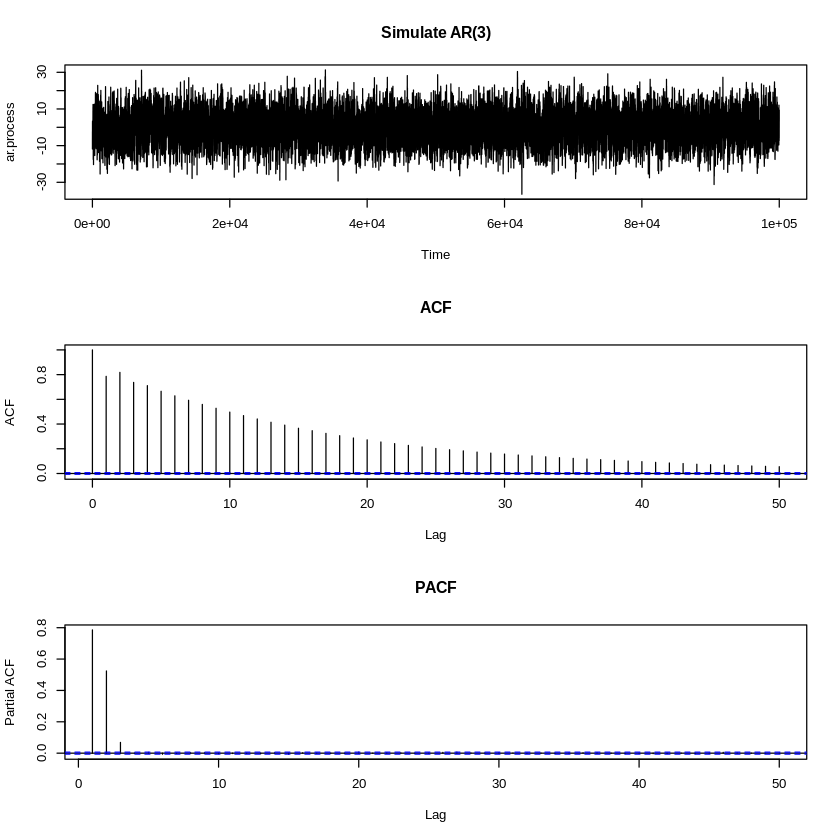

In [23]:
par(mfrow=c(3,1))
plot(ar.process, main='Simulate AR(3)')
acf(ar.process, main='ACF')
pacf(ar.process, main='PACF')

=> AR(3)에서 PACF cuts off after lag 3 임을 알 수 있음